In [1277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

In [1278]:
df = pd.read_csv("D:\ML\Datasets\Iris.csv")
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [1279]:
df.shape

(100, 6)

In [1280]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,100.000000,100.000000,100.000000,100.000000,100.000000
mean,50.500000,5.471000,3.094000,2.862000,0.785000
std,29.011492,0.641698,0.476057,1.448565,0.566288
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,25.750000,5.000000,2.800000,1.500000,0.200000
50%,50.500000,5.400000,3.050000,2.450000,0.800000
75%,75.250000,5.900000,3.400000,4.325000,1.300000
max,100.000000,7.000000,4.400000,5.100000,1.800000


In [1281]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

Replace the species names to binary 1, 0 values:

In [1282]:
df.Species = df.Species.replace(to_replace=['Iris-setosa', 'Iris-versicolor'], value =[0, 1])
df.head(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,0
1,2,4.9,3.0,1.4,0.2,0
2,3,4.7,3.2,1.3,0.2,0
3,4,4.6,3.1,1.5,0.2,0
4,5,5.0,3.6,1.4,0.2,0


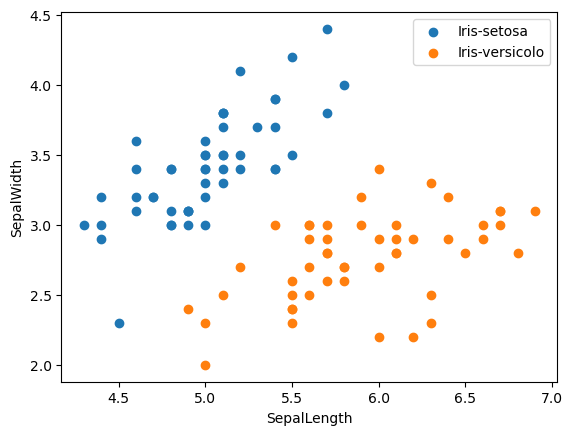

In [1283]:
plt.scatter(df[:50].SepalLengthCm,df[:50].SepalWidthCm, label='Iris-setosa') # draws a scatter plot, plotting a single dot for each observation
plt.scatter (df[51:].SepalLengthCm ,df[51:].SepalWidthCm ,label='Iris-versicolo') # draws a scatter plot, plotting a single dot foreach observation
plt.xlabel('SepalLength') # xlabel sets the label for the x-axis
plt.ylabel('SepalWidth') # ylabel sets the label for the y-axis
plt.legend(loc='best') # displays small box containing description of the graph elements at the default (best location for example blue dot denotes Iris - setosa)
plt.show()

In [1284]:
X = df.drop(labels=['Id', 'Species'], axis=1).values # the drop() function is utilised to remove rows or columns by specifying labels and corresponding axis. Here the columns Id and Species are being removed.
y = df.Species.values

In order to make random numbers predictable, seeds are set at a value of 23(??) so the generator creating a random value for the seed value (23) will always be the same random value. This makes the
seed reproducible.

In [1285]:
seed = 5
np.random.seed(seed)
tf.set_random_seed(seed) # sets the global random seed

In [1286]:
# creating the training set which will consider 40% of the data and setting replace to false to avoid double sampling
train_set = np.random.choice(len(X), round (len(X) * 0.4), replace = False)
train_set

array([66, 32, 46, 28, 74, 23, 10, 20, 17, 35, 97, 37, 70, 40, 60, 34, 42,
       57, 12, 69, 94, 56, 22, 39, 24, 13, 63, 71, 55, 87,  6, 88, 64, 26,
       48, 50, 72, 54, 21, 25])

range and len are used together here to iterate through all indexes in a sequence then the set method converts the multiple items into a sequence of iterable items that are then converted into a list by the list method:

In [1287]:
# creating the train and test variables and the test set that will consider 60% of the data
test_set = np.array(list(set(range(len(X))) - set(train_set)))
test_set

array([ 0,  1,  2,  3,  4,  5,  7,  8,  9, 11, 14, 15, 16, 18, 19, 27, 29,
       30, 31, 33, 36, 38, 41, 43, 44, 45, 47, 49, 51, 52, 53, 58, 59, 61,
       62, 65, 67, 68, 73, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86,
       89, 90, 91, 92, 93, 95, 96, 98, 99])

In [1288]:
train_X = X[train_set]
train_y = y[train_set]
test_X = X[test_set]
test_y = y[test_set]

Defining the normalised function (min-max feature scaling):

In [1289]:
def min_max_normalised(data):
    col_max = np.max(data, axis=0)
    col_min = np.min(data, axis=0)
    return np.divide(data - col_min, col_max - col_min)

train_X = min_max_normalised(train_X)
test_X = min_max_normalised(test_X)

In TensorFlow, variables are similar to standard coding variables that are initialized and can be modified later. Placeholders, on the other hand d o n t require that initial value. It reserves a block of memory for future use.

Declare two variables that need to be learned and initialize them:

In [1290]:
A = tf.Variable(tf.random_normal(shape=[4, 1]))
# there are 4 features here , A s dimensions are [4, 1]
b = tf.Variable(tf.random_normal(shape=[1, 1]))
init = tf. global_variables_initializer() # global Variables Initializer
sess = tf.Session() # starting the Tensorflow Session
sess.run(init) # initializing the Variables

Placeholder data of type float with dimensions [None, 4]. The none implies any number of rows are acceptable however the second dimension is fixed at 4 meaning each row needs to have 4 columns.\

Define two placeholders:

In [1291]:
data = tf.placeholder(dtype=tf.float32, shape=[None, 4])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

Declare model needed to learn:

In [1292]:
mod = tf.matmul(data, A) + b #the matmul() method is utilised to work out the matrix product of two arrays

Declare the loss function (loss function formula is used to determine the value of weight and bias from the given datase ) > use sigmoid cross - entropy loss function > firstly doing a sigmoid on the model result and then using the cross - entropy loss function:

In [1293]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

In [1294]:
learning_rate = 0.003
batch_size = 30 # number of training samples used in one full iteration
epoch_iter = 1500 # an epoch is the full iteration of the entire training data set

Define the Gradient Descent Optimizer -> algorithm utilised to work out the optimised/ ideal parameters:

In [1295]:
opt = tf.train.GradientDescentOptimizer(learning_rate)

In [1296]:
# define the goal i.e. a minimized loss
goal = opt.minimize(loss)

# defining the accuracy
prediction = tf.round(tf.sigmoid(mod)) # the default threshold of 0.5 is rounded off
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32) # converting data type bool into float32 data type
accuracy = tf.reduce_mean(correct) # working out the average

To start training the model define the variables t h a t ll be storing the results:

In [1297]:
loss_trace = []
train_acc = []
test_acc = []

#### Model training:

In [1298]:
# Iterating through all the epochs
for epoch in range (epoch_iter):
    # Generate random batch index
    batch_index = np.random.choice(len(train_X), size=batch_size) #np.random.choice generates a random sample from a 1D array.
    batch_train_X = train_X[batch_index] # return the value in the array train_X at index batch_index i.e. the index of the random sample
    batch_train_y = np.matrix(train_y[batch_index]).T # np.matrix returns a matrix of an array - like object (the value in train_y at index batch_index
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_train_acc = sess.run(accuracy, feed_dict={data: train_X, target: np.matrix(train_y).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: test_X, target: np.matrix(test_y).T})
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    #if(epoch + 1) % 300 == 0:
    if(epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_ac: {:5f} test_acc:{:5f}'
              .format(epoch + 1, temp_loss, temp_train_acc, temp_test_acc))

epoch:  300 loss: 0.760183 train_ac : 0.525000 test_acc :0.250000
epoch:  600 loss: 0.689097 train_ac : 0.625000 test_acc :0.450000
epoch:  900 loss: 0.648515 train_ac : 0.925000 test_acc :0.900000
epoch: 1200 loss: 0.593198 train_ac : 1.000000 test_acc :0.950000
epoch: 1500 loss: 0.544320 train_ac : 1.000000 test_acc :0.983333


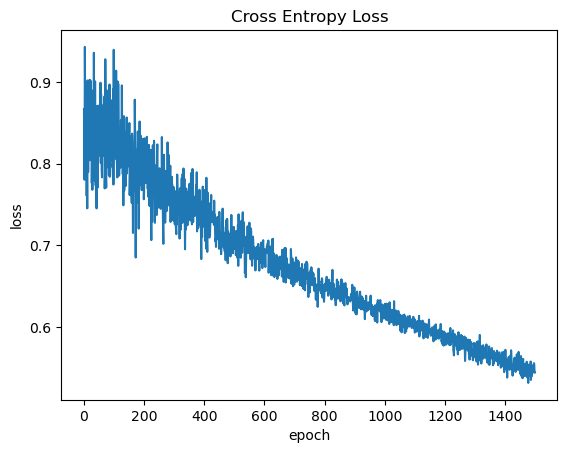

In [1299]:
plt.clf() # clears previous f i g u r e s details but leaves the window open so new graphs can be drawn on it
plt.plot(loss_trace) # returns graph with lines connecting plot points
plt.title('Cross Entropy Loss') # specifies title for the graph
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

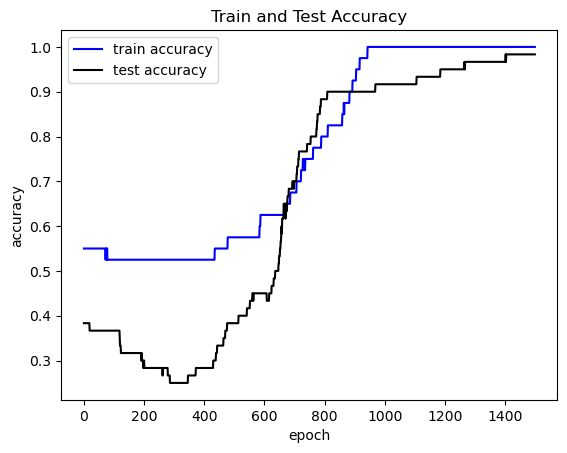

In [1300]:
plt.clf()
plt.plot(train_acc, 'b-', label='train accuracy') # colors b -> blue, k -> default/ black and - is the line style.
plt.plot(test_acc, 'k-', label='test accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Train and Test Accuracy')
plt.legend(loc='best')
plt.show()